## Goal
It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

## Data Dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# for this update : 
### 1-cleared the most of the visualization sells that i didn't nead anymore (since i covered the decisions related to it) 
### 2-cleaned the code . 
### 3-applied ml algorithm to predict the survival missing values on the testing data and got 77.2 accuracy.

In [2]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.linear_model import LogisticRegression

In [3]:
plt.rc("font", size=14)
sns.set(style="dark") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [70]:
training_data=pd.read_csv('Desktop/titanic/train.csv')
testing_data=pd.read_csv('Desktop/titanic/test.csv')
# the testing is same as training but it doesn't have 'Survived' available 

In [71]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
unique_tickets=training_data.Ticket.unique()
len(unique_tickets[1])
for x in range(len(unique_tickets)):
    unique_tickets[x]=unique_tickets[x].split(' ')
    if(len(unique_tickets[x])==1):
        if unique_tickets[x][0]=='1'or'2'or'3'or'4'or'5'or'6'or'7'or'8'or'9':
           # print(unique_tickets[x])
            unique_tickets[x]=(unique_tickets[x][0][0]+unique_tickets[x][0][1]+unique_tickets[x][0][2])
        else:
            pass
  #  else:pass

    elif len(unique_tickets[x])==2:
        unique_tickets[x]=unique_tickets[x][0]

    elif len(unique_tickets[x])==3 :
        unique_tickets[x]=unique_tickets[x][0]#+unique_tickets[x][1]


### this is the orgional data coming from the code  without taking the unique values from it 

In [73]:
print(len(unique_tickets))
print(unique_tickets)

681
['A/5' 'PC' 'STON/O2.' '113' '373' '330' '174' '349' '347' '237' 'PP' '113'
 'A/5.' '347' '350' '248' '382' '244' '345' '264' '239' '248' '330' '113'
 '347' '263' '199' '330' '349' 'PC' 'PC' '335' 'C.A.' 'PC' '113' '267'
 'A./5.' '345' '265' '754' '116' '349' 'SC/Paris' '330' 'S.C./A.4.' '370'
 '143' '266' '349' '310' 'A/4.' 'PC' '292' '113' '199' 'C.A.' '269' 'C.A.'
 'CA' '266' '113' '369' '347' 'PC' '266' 'C.A.' 'S.P.' '310' '315' 'C.A.'
 'S.O.C.' '268' '160' '348' '349' '374' '248' '364' '345' '345' '330' '113'
 'SO/C' '310' 'W./C.' 'SOTON/OQ' '343' '343' '347' 'W.E.P.' 'C.A.' '364'
 '374' 'PC' 'PC' '231' '244' '349' '349' '352' '754' '310' '349' '343'
 '312' '349' '371' '110' '266' '324' '413' '262' 'STON/O' '370' 'PC' 'A4.'
 '272' '370' 'C' '266' '347' '349' 'SOTON/O.Q.' 'A/5.' '228' 'C.A.'
 'SC/PARIS' '117' '753' 'PC' '267' '347' 'STON/O2.' '365' '231' 'C.A.'
 '350' '230' '244' 'S.O.P.' '113' 'A.5.' 'A/5.' 'Fa' 'PC' '358' 'SOTON/OQ'
 '315' 'CA.' '371' 'C.A.' '347' '315' '363'

In [74]:
s=pd.DataFrame(unique_tickets)
s.head(2)

,0
0,A/5
1,PC


### looking at the filtered data 

In [75]:
q=s[0].unique()
q.sort()
print(len(q))
q

164


array(['110', '111', '112', '113', '116', '117', '118', '119', '122',
       '124', '127', '130', '132', '135', '143', '149', '160', '169',
       '174', '177', '198', '199', '200', '211', '214', '218', '219',
       '220', '222', '223', '226', '228', '229', '230', '231', '233',
       '234', '236', '237', '239', '240', '241', '243', '244', '248',
       '250', '262', '263', '264', '265', '266', '267', '268', '269',
       '270', '272', '278', '281', '282', '284', '285', '286', '290',
       '291', '292', '297', '310', '312', '314', '315', '323', '324',
       '330', '334', '335', '336', '341', '342', '343', '345', '346',
       '347', '348', '349', '350', '352', '358', '362', '363', '364',
       '365', '367', '368', '369', '370', '371', '372', '373', '374',
       '376', '382', '383', '384', '386', '392', '394', '413', '457',
       '546', '572', '653', '656', '693', '695', '726', '753', '754',
       '755', '759', '847', '923', 'A./5.', 'A.5.', 'A/4', 'A/4.', 'A/5',
       'A/5.', '

In [76]:
# i'm just putting it in here ... 
# there is just  column in the data that have the Fare as nan -_- idc...
testing_data.loc[pd.isnull(testing_data['Fare'])==True,'Fare']=testing_data.Fare.median()

## chaging the 'Sex' from str to numbers 

In [77]:
#training_data.info() # there is null values at : 'Age' , 'Cabin' , 'Embarked'

#converting male to 1 , female to 0

training_data.loc[training_data['Sex']=='male','Sex']=1
training_data.loc[training_data['Sex']=='female','Sex']=0

testing_data.loc[testing_data['Sex']=='male','Sex']=1
testing_data.loc[testing_data['Sex']=='female','Sex']=0


In [78]:
print(len(training_data['Cabin'].unique()))
# there is 148 different cabins i will turn them into 8 cabins  # A,B,C,D,E,F,G,nan
print(pd.isnull(training_data['Cabin']).sum())
training_data.head()

148
687


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### renamming the Cabin to numbers  to united numbers to to simplify the plottings

In [79]:
# cleaning data 

#renaming the data 'Cabins' to give it the computing ability   #Cabins :

#1- turning the Cabins to a single level system # and turning them into numbers for the calculations 

for i in range(len(training_data)):
    if pd.notnull(training_data.loc[i,'Cabin']):
        if type(training_data.loc[i,'Cabin'])==str:
            
            if 'A' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=1
            elif 'B' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=2
            elif 'C' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=3
            elif 'D' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=4
            elif 'E' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=5
            elif 'F' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=6
            elif 'G' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=7
    
                 
                
 #2- turning the Cabins on testing_data to a single level system

for i in range(len(testing_data)):
    if pd.notnull(testing_data.loc[i,'Cabin']):
        if type(testing_data.loc[i,'Cabin'])==str:
            

            if 'A' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=1
            elif 'B' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=2
            elif 'C' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=3
            elif 'D' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=4
            elif 'E' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=5
            elif 'F' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=6
            elif 'G' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=7 
#someking of a mistake (someone put a Cabin as T and there is no Cabins called T)
#turning it to nan
#cleaning...
training_data.loc[training_data['Cabin']=='T','Cabin'] = np.nan

#Cabins:                
# 'A' = 1 , 'B'=2 , 'C'=3 , 'D'=4,'E'=5, 'F'=6, 'G'=7
# nan variables on 8

### renaming the nans on the 'Cabin' for the training and the testing data  to number 8



In [80]:
for i in range(len(training_data)):
    if pd.isnull(training_data.loc[i,'Cabin']):
        training_data.loc[i,'Cabin']=8 
for i in range(len(testing_data)):
    if pd.isnull(testing_data.loc[i,'Cabin']):
        testing_data.loc[i,'Cabin']=8

In [81]:
print(training_data['Cabin'].unique()) # 1,2,3,4,5,6,7,8
print(training_data['Pclass'].unique())

[8 3 5 7 4 1 2 6]
[3 1 2]


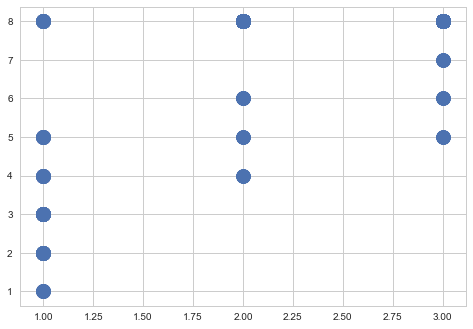

In [82]:
s=plt.scatter(training_data['Pclass']
               ,training_data['Cabin'],s=200 #the size of the dotts
             )

### we can simply see that the 'calss 1 ' people lived in the upper Cabins(from 1 to ), and the 'class 2' people lived int the middle Cabins (from 4th to 6th), and the 'class 3' people (#poor or #workers) lived in the lower section (from 5th to 7th)  ||||| the 8th is the nans by the way 

In [83]:
training_data['Age']=training_data['Age'].fillna(np.median(training_data[pd.notnull(training_data['Age'])]['Age']))
testing_data['Age']=testing_data['Age'].fillna(np.median(testing_data[pd.notnull(testing_data['Age'])]['Age']))

### looking at the unique values for the columns 

In [84]:
print('survived : ', training_data.Survived.unique())
print('Sex : ',training_data.Sex.unique())  # 1 for male , 0 for female 
print('Pclass : ',training_data.Pclass.unique())#Ticket class
print('SibSp :',training_data.SibSp.unique())# of siblings / spouses aboard the Titanic
print('Embarked : ',training_data.Embarked.unique()) # Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
print('Parch : ',training_data.Parch.unique())# of parents / children aboard the Titanic
print('Cabin :',training_data.Cabin.unique())

#print(training_data['Fare']) # the ticket cost  # bad idea ... 

survived :  [0 1]
Sex :  [1 0]
Pclass :  [3 1 2]
SibSp : [1 0 3 4 2 5 8]
Embarked :  ['S' 'C' 'Q' nan]
Parch :  [0 1 2 5 3 4 6]
Cabin : [8 3 5 7 4 1 2 6]


### by coding #training_data.Sex.plot('hist') # about 1/3 the ship were females and the others were males 
### training_data.Survived.plot('hist') # about 1/3 survived and the others died 

In [85]:
x=1

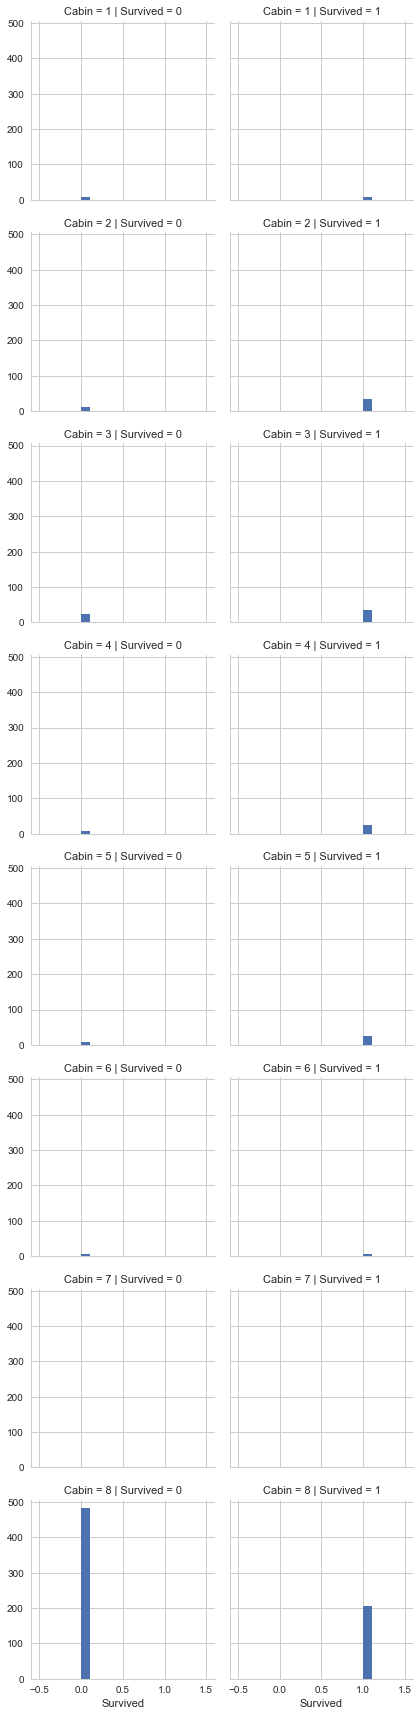

In [86]:
grid =sns.FacetGrid(training_data,col='Survived',row='Cabin',margin_titles=False) # FaceGrid : it makes the histograms ready in seaborn 
                                                # margin_titles : to make the titles show on like its a data frames ( on the side and top )
grid.map(plt.hist,'Survived')

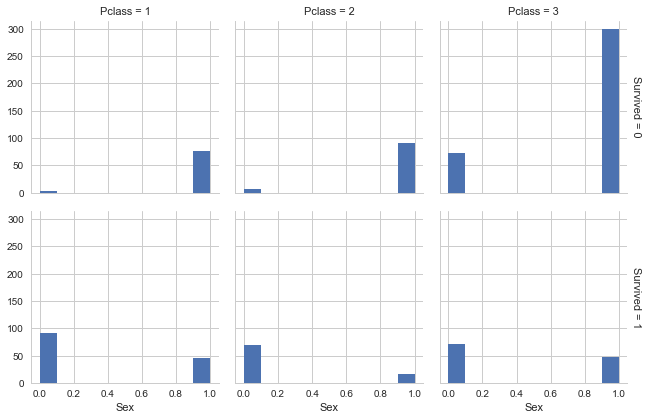

In [21]:
grid =sns.FacetGrid(training_data,row='Survived',col='Pclass',margin_titles=True) # FaceGrid : it makes the histograms ready in seaborn 
                                                # margin_titles : to make the titles show on like its a data frames ( on the side and top )
grid.map(plt.hist,'Sex')

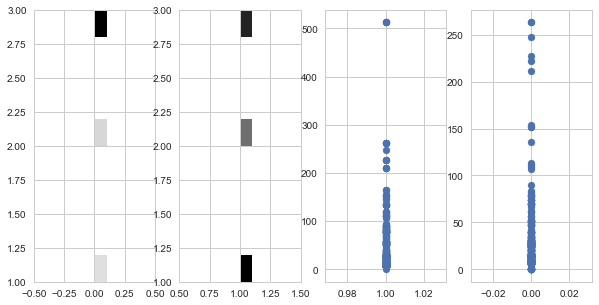

In [22]:
survive=training_data[training_data['Survived']==1]
died=training_data[training_data['Survived']==0]

fig,ax=plt.subplots(1,4,figsize=(10,5))
ax[1].hist2d(x=survive['Survived'],y=survive['Pclass'])
ax[0].hist2d(x=died['Survived'],y=died['Pclass'])

ax[2].scatter(survive['Survived'],survive['Fare'])
ax[3].scatter(died['Survived'],died['Fare'])


# remember what we did ? !

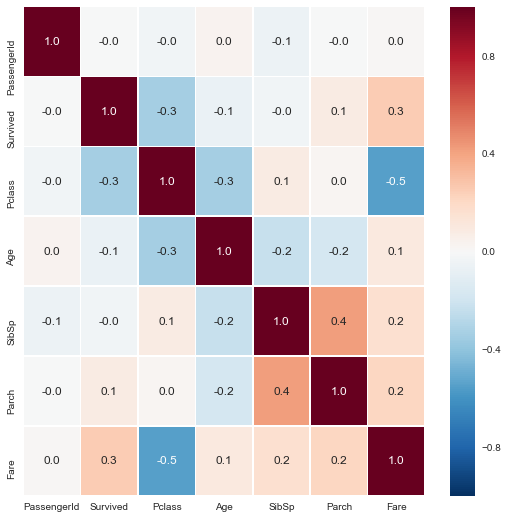

In [23]:
a,ax=plt.subplots(figsize=(9,9))
sns.heatmap(training_data.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)
#there is correlation between survived and (Pclass,Fare)

### making a list of the data to carry the training and testing so we can edit both of them easily for the ML model

In [24]:
#make a list of the 2 datasets for the General changes 
full_data = [training_data, testing_data]

### turning the Embarked into numbers (S to 1, Q to 2, C to 3)

In [25]:
full_data[0]=full_data[0].dropna() # there is just 2 rows on the training that have nans on the Embarked ! 

In [26]:
for dataset in full_data:
    dataset['Embarked']=dataset['Embarked'].replace('S',1)
    dataset['Embarked']=dataset['Embarked'].replace('Q',np.int32(2))
    dataset['Embarked']=dataset['Embarked'].replace('C',np.int32(3))


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

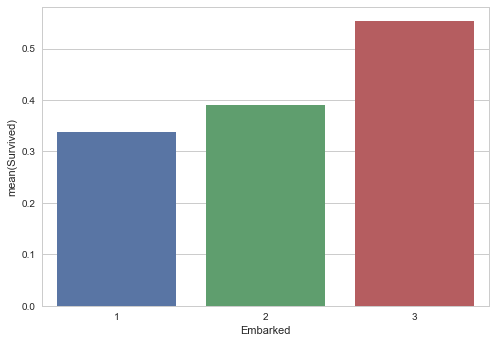

In [27]:
# the most and least 'Embarked' that the people survived on 
sns.barplot(full_data[0]['Embarked'],full_data[0]['Survived'],ci=False)

### Calssifying the names into "a useful feature" ('Title')

In [28]:
# Define get_title function to extract titles from passenger names
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1) # 1 to erase the space befor the title
    return ""

#testing it..
get_title('Braund, Mr. Owen Harris')

'Mr'

In [29]:
# Create a new feature 'Title' that contains the titles of passenger names

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
    del dataset['Name'] # delete the origional column 'Name' since we don't need it anymore 
    
    print(dataset.Title.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [30]:
# Group all miss-spelled titles into their orgional titles

for dataset in full_data:

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

### does the title mean anything anyways ? 

In [31]:
full_data[0].groupby(['Sex','Pclass','Title']).aggregate(np.median).head(10) 
# so the title actually matters !
#( but survived changes the value when Pclass changes: as you can see Miss survival changed when she was on Pclass 1 and 2 )
# we gotta search by the 3 of them ('Sex','Pclass','Title')

PassengerId  Survived   Age  SibSp  Parch      Fare  \
Sex Pclass Title                                                           
0   1      Countess        760.0       1.0  33.0    0.0    0.0  86.50000   
           Dr              797.0       1.0  49.0    0.0    0.0  25.92920   
           Lady            557.0       1.0  48.0    1.0    0.0  39.60000   
           Miss            381.0       1.0  29.0    0.0    0.0  90.00000   
           Mrs             493.0       1.0  37.0    1.0    0.0  78.73335   
    2      Miss            444.0       1.0  24.0    0.0    0.0  13.00000   
           Mrs             438.0       1.0  32.0    1.0    0.0  26.00000   
    3      Miss            372.0       0.5  22.0    0.0    0.0   8.75625   
           Mrs             405.5       0.5  29.0    1.0    1.0  15.97500   
1   1      Capt            746.0       0.0  70.0    1.0    1.0  71.00000   

                     Embarked  
Sex Pclass Title               
0   1      Countess       1.0  
           Dr             1.0  
           Lady           3.0  
           Miss           2.0  
           Mrs            1.0  
    2      Miss           1.0  
           Mrs            1.0  
    3      Miss           1.0  
           Mrs            1.0  
1   1      Capt           1.0

## getting the median age given the (Title,Sex,Pclass)

In [32]:
# fill the nan ages with the proper ages given (Title,Sex,Pclass)

for dataset in full_data:
    for a in dataset.Sex.unique():
        for b in dataset.Pclass.unique():
            for c in dataset.loc[(dataset['Sex']==a) & (dataset['Pclass']==b),'Title'].unique():
                # get the median Age of the not-null Ages that fit the condition 
                the_median=dataset.loc[(pd.notnull(dataset['Age'])) & (dataset['Pclass']==b) &
                                       (dataset['Sex']==a) & (dataset['Title']==c),'Age'].median()

               # set the median Age on the null Ages that fit the condition 
                dataset.loc[(pd.isnull(dataset['Age'])) & (dataset['Pclass']==b) & 
                                  (dataset['Sex']==a) &(dataset['Title']==c),'Age']=the_median

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [33]:
for dataset in full_data:
    print(dataset[pd.isnull(dataset.Age)].sum())
# so now there is actually no nulls on 'Age' now 

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
Title          0.0
dtype: float64
PassengerId    0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
Title          0.0
dtype: float64


In [34]:
# is the titanic movie right about the captin death tho ? 
training_data,testing_data=full_data
training_data[training_data['Title']=='Capt']
#the captin of the titanic didn't survive...
# well, that was sad lol 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
745,746,0,1,1,70.0,1,1,WE/P 5735,71.0,2,1,Capt


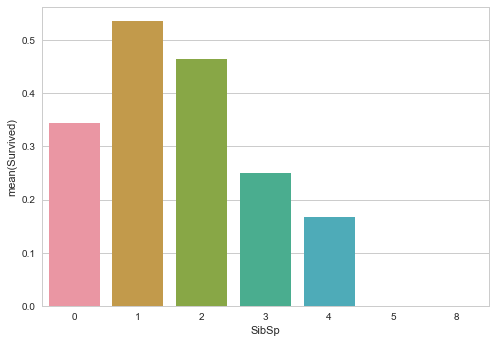

In [35]:
sns.barplot(full_data[0]['SibSp'],full_data[0]['Survived'],ci=False)

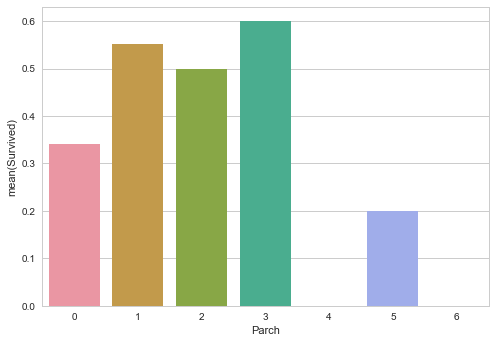

In [36]:
sns.barplot(full_data[0]['Parch'],full_data[0]['Survived'],ci=False)

In [37]:
for dataset in full_data:
    dataset['relations']=dataset['SibSp']+dataset['Parch']

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### so having relations have an effective percentage of the survival 

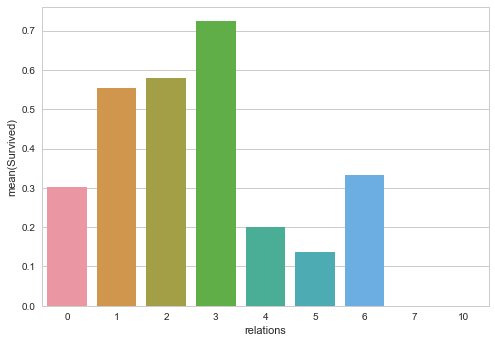

In [38]:
sns.barplot(full_data[0]['relations'],full_data[0]['Survived'],ci=False)

# testing if the data will work or won't on a model 

### make all the features but survived as x_train/x_test and the survived as y_train to predict the y_test
### lets try with a small chunk of the data

### seems like i'm working properly to fit a model 

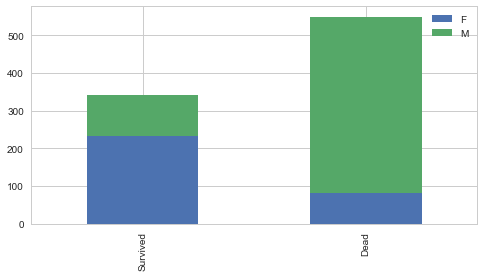

In [87]:
survived_sex = training_data[training_data['Survived']==1]['Sex'].value_counts()
dead_sex = training_data[training_data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(8,4))
plt.legend('FM')


### filling the only null value on full_fata ! 

In [40]:
training_data=full_data[0]
testing_data=full_data[1]

# from here and on you can miss with the full data as you wish, if you gotta reset it just use the cell bellow 

In [41]:
full_data=[training_data,testing_data]

In [42]:
full_data[0].head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,relations
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,8,1,Mr,1
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,3,3,Mrs,1


In [43]:
# making dummies by gathering the data to get all of the dummies then get it back to its orgional state + having the new dummies
# making dummies for training and testing data (for 'Title','Cabin','Pclass','Embarked')

train_length = len(full_data[0]) # to basically divide it 

dataset = pd.concat(objs=[full_data[0], full_data[1]], axis=0) # gathering the data 

# getting the dummies on the gathered data then adding the dummies to the gathered data... 
dummies_titles = pd.get_dummies(dataset['Title'],prefix='Title')
dataset = pd.concat([dataset,dummies_titles],axis=1)


dummies_titles = pd.get_dummies(dataset['Cabin'],prefix='Cabin')
dataset = pd.concat([dataset,dummies_titles],axis=1)


dummies_titles = pd.get_dummies(dataset['Pclass'],prefix='Pclass')
dataset = pd.concat([dataset,dummies_titles],axis=1)


dummies_titles = pd.get_dummies(dataset['Embarked'],prefix='Embarked')
dataset = pd.concat([dataset,dummies_titles],axis=1)

# saving the changes 
full_data[0] = dataset[:train_length].copy()
full_data[1] = dataset[train_length:].copy()
del full_data[1]['Survived'] # it is generated as nan by the first concat (while gathering the data )

In [44]:
print(len(full_data[0].columns))
print(len(full_data[1].columns))
# nice :F

42
41


In [45]:
full_data[0].head(2)

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,...,Cabin_5,Cabin_6,Cabin_7,Cabin_8,Pclass_1,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Embarked_3
0,22.0,8,1,7.2500,0,1,3,1,1,0.0,...,0,0,0,1,0,0,1,1,0,0
1,38.0,3,3,71.2833,0,2,1,0,1,1.0,...,0,0,0,0,1,0,0,0,0,1


In [46]:
# deleting the columns that we changed 
del full_data[0]['Title']
del full_data[1]['Title']

del full_data[0]['Cabin']
del full_data[1]['Cabin']

del full_data[0]['Pclass']
del full_data[1]['Pclass']

del full_data[0]['Embarked']
del full_data[1]['Embarked']

del full_data[0]['PassengerId']
del full_data[1]['PassengerId']

del full_data[0]['Ticket']
del full_data[1]['Ticket']

In [47]:
print(len(full_data[0].columns))
print(len(full_data[1].columns))
# nice :F

36
35


In [48]:
print(full_data[0].columns)
full_data[0].head(2)

Index(['Age', 'Fare', 'Parch', 'Sex', 'SibSp', 'Survived', 'relations',
       'Title_Capt', 'Title_Col', 'Title_Countess', 'Title_Don', 'Title_Dona',
       'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rev',
       'Title_Sir', 'Cabin_1', 'Cabin_2', 'Cabin_3', 'Cabin_4', 'Cabin_5',
       'Cabin_6', 'Cabin_7', 'Cabin_8', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_1', 'Embarked_2', 'Embarked_3'],
      dtype='object')


,Age,Fare,Parch,Sex,SibSp,Survived,relations,Title_Capt,Title_Col,Title_Countess,...,Cabin_5,Cabin_6,Cabin_7,Cabin_8,Pclass_1,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Embarked_3
0,22.0,7.2500,0,1,1,0.0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,38.0,71.2833,0,0,1,1.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [49]:
print(full_data[1].columns)
full_data[1].head(2)

Index(['Age', 'Fare', 'Parch', 'Sex', 'SibSp', 'relations', 'Title_Capt',
       'Title_Col', 'Title_Countess', 'Title_Don', 'Title_Dona', 'Title_Dr',
       'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rev', 'Title_Sir',
       'Cabin_1', 'Cabin_2', 'Cabin_3', 'Cabin_4', 'Cabin_5', 'Cabin_6',
       'Cabin_7', 'Cabin_8', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_1',
       'Embarked_2', 'Embarked_3'],
      dtype='object')


,Age,Fare,Parch,Sex,SibSp,relations,Title_Capt,Title_Col,Title_Countess,Title_Don,...,Cabin_5,Cabin_6,Cabin_7,Cabin_8,Pclass_1,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Embarked_3
0,34.5,7.8292,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,47.0,7.0000,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


# now the data is basically ready to be used for ML

In [50]:
# this is how the ravel actually looks like # the output of the model seems to get out as a ravel 
s=full_data[1]['Age'].copy()
s.values.ravel()[:3]




array([ 34.5,  47. ,  62. ])

In [51]:
temp1=full_data[0].copy()
temp2=full_data[1].copy()

In [52]:
full_data[0]=temp1.copy()
full_data[1]=temp2.copy()

# so from here, since we're sure that everything is working preperly i'm gonna make the validation set so i can test my algorithms ! 

### i'm making the validation out of the training data , so i will take the fifth of the data as a validation sit and i'll use the cross validation for it 

In [53]:
#dataset = pd.concat(objs=[full_data[0], full_data[1]], axis=0) # gathering the data 
from sklearn.model_selection import train_test_split
training=full_data[0]
training,validation=train_test_split(training,test_size=0.2)
print('the length of the trianing is ',len(training))
print('the length of the validation is ',len(validation))

the length of the trianing is  711
the length of the validation is  178


### so i will try to delete the column that i might not need (cabin_8)

In [54]:
training_data,testing_data=[full_data[0],full_data[1]]

In [55]:
full_data=[training_data,testing_data]

In [56]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
trying=full_data[0].copy()
training_x=trying.copy()
del training_x['Survived']
training_y =trying['Survived'].copy()

ss=logistic.fit(training_x,training_y)
testing=full_data[1]
result=logistic.predict(testing)
#print(logistic.score(x_test,y_test))



In [57]:
# so the first one is basically doing the algorithm for the testing data alone 
x_train,x_test,y_train,y_test = train_test_split(training_x,training_y,test_size=0.2,random_state=0)
logistic =LogisticRegression()
ss=logistic.fit(x_train,y_train)
print(logistic.score(x_test,y_test))

# to make it for as a cross validation thingy 
trying=full_data[0].copy()
training_x=trying.copy()
del training_x['Survived']
training_y =trying['Survived'].copy()

from sklearn.model_selection import cross_val_score
scores=cross_val_score(logistic,training_x,training_y,cv=5)
scores

0.747191011236


array([ 0.82022472,  0.80898876,  0.80898876,  0.82022472,  0.85875706])

### the same code but with deleting the Cabin_8 ( which is the Cabin that have the null values ) ( it's a bit missed up ) 

In [58]:
del full_data[0]['Cabin_8']
del full_data[1]['Cabin_8']
# so the first one is basically doing the algorithm for the testing data alone 
x_train,x_test,y_train,y_test = train_test_split(training_x,training_y,test_size=0.2,random_state=0)
logistic =LogisticRegression()
ss=logistic.fit(x_train,y_train)
print(logistic.score(x_test,y_test))

# to make it for as a cross validation thingy 
trying=full_data[0].copy()
training_x=trying.copy()
del training_x['Survived']
training_y =trying['Survived'].copy()

from sklearn.model_selection import cross_val_score
scores=cross_val_score(logistic,training_x,training_y,cv=5)
scores

0.747191011236


array([ 0.8258427 ,  0.81460674,  0.81460674,  0.80898876,  0.85310734])

In [59]:
testing.head(2)

,Age,Fare,Parch,Sex,SibSp,relations,Title_Capt,Title_Col,Title_Countess,Title_Don,...,Cabin_4,Cabin_5,Cabin_6,Cabin_7,Pclass_1,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Embarked_3
0,34.5,7.8292,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,47.0,7.0000,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [60]:
from sklearn.neighbors import KNeighborsClassifier
kNeibours=KNeighborsClassifier()

trying=full_data[0].copy()
training_x=trying.copy()
del training_x['Survived']
training_y =trying['Survived'].copy()

from sklearn.model_selection import cross_val_score
scores=cross_val_score(kNeibours,training_x,training_y,cv=5)
scores

array([ 0.6741573 ,  0.70786517,  0.75280899,  0.73595506,  0.71751412])

In [61]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

trying=full_data[0].copy()
training_x=trying.copy()
del training_x['Survived']
training_y =trying['Survived'].copy()

from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree,training_x,training_y,cv=5)
scores

array([ 0.75842697,  0.78651685,  0.79775281,  0.71910112,  0.79096045])

In [62]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

trying=full_data[0].copy()
training_x=trying.copy()
del training_x['Survived']
training_y =trying['Survived'].copy()

from sklearn.model_selection import cross_val_score
scores=cross_val_score(regressor,training_x,training_y,cv=5)
scores

array([-0.1775468 ,  0.08760486,  0.10843991, -0.09817787,  0.00873656])

In [63]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
trying=full_data[0].copy()
training_x=trying.copy()
del training_x['Survived']
training_y =trying['Survived'].copy()

from sklearn.model_selection import cross_val_score
scores=cross_val_score(forest,training_x,training_y,cv=5)
scores

array([ 0.79213483,  0.76404494,  0.8258427 ,  0.75280899,  0.83615819])

In [64]:
from sklearn.linear_model import LinearRegression
linearRegression=LinearRegression()
trying=full_data[0].copy()
training_x=trying.copy()
del training_x['Survived']
training_y =trying['Survived'].copy()

from sklearn.model_selection import cross_val_score
scores=cross_val_score(linearRegression,training_x,training_y,cv=5)
scores

array([ 0.34601216,  0.36944679,  0.40216463,  0.30003119,  0.53346243])

In [65]:
from sklearn.svm import SVC
svc=SVC()

trying=full_data[0].copy()
training_x=trying.copy()
del training_x['Survived']
training_y =trying['Survived'].copy()

from sklearn.model_selection import cross_val_score
scores=cross_val_score(svc,training_x,training_y,cv=5)
scores

array([ 0.65168539,  0.73595506,  0.70786517,  0.75280899,  0.75141243])

In [66]:
from sklearn.svm import SVR
svr=SVR()

trying=full_data[0].copy()
training_x=trying.copy()
del training_x['Survived']
training_y =trying['Survived'].copy()

from sklearn.model_selection import cross_val_score
scores=cross_val_score(svr,training_x,training_y,cv=5)
scores

array([ 0.05020927,  0.22968337,  0.21995611,  0.23913502,  0.38184378])

### LogisticRegression is the first we picked, and its the best one.

### a small advice .... visit http://scikit-learn.org/stable/modules/cross_validation.html to see what did i actually do ! 

In [67]:
a=pd.DataFrame(testing_data['PassengerId'])
a['Survived']=result
#del a['index']
a.to_csv('submission.csv',index=False)
#a.reindex('PassengerId')
#a

KeyError: 'PassengerId'

## i uploaded the result file from this code  and got 77.2% accuracy 